# 회귀
mse, mae 구하기
target : 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', header=None, 
                  delimiter=r"\s+", names=column_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df = pd.read_csv('/content/Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape, y.shape

((506, 13), (506,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2022, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

(102,)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, input_shape=(13,), activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS=200
BATCH_SIZE = 16

model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(X_train,y_train, epochs = EPOCHS, validation_split = 0.2,
                    batch_size=BATCH_SIZE)

Epoch 1/200
21/21 [==============================] - 1s 12ms/step - loss: 622.8431 - mae: 23.1546 - mse: 622.8431 - val_loss: 585.1291 - val_mae: 22.4495 - val_mse: 585.1291
Epoch 2/200
21/21 [==============================] - 0s 4ms/step - loss: 606.6697 - mae: 22.7204 - mse: 606.6697 - val_loss: 569.5407 - val_mae: 22.0085 - val_mse: 569.5407
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 589.7378 - mae: 22.2140 - mse: 589.7378 - val_loss: 552.5985 - val_mae: 21.5102 - val_mse: 552.5985
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 570.1403 - mae: 21.6079 - mse: 570.1403 - val_loss: 532.3079 - val_mae: 20.8810 - val_mse: 532.3079
Epoch 5/200
21/21 [==============================] - 0s 4ms/step - loss: 545.5188 - mae: 20.8440 - mse: 545.5188 - val_loss: 507.7373 - val_mae: 20.1304 - val_mse: 507.7373
Epoch 6/200
21/21 [==============================] - 0s 4ms/step - loss: 516.6942 - mae: 19.9576 - mse: 516.6942 - val_loss: 478.0269 

In [ ]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['mse'], label="mse")
  plt.plot(history.epoch, hist['val_mse'], label='val_mse')
  plt.legend()
  plt.show()

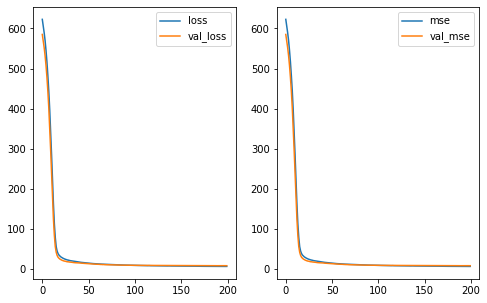

In [ ]:
plot_history(history)

In [ ]:
X_test[:5]

array([[-0.62185434, -0.37456328, -0.65212798, -0.27144836, -0.52895022,
         0.07537404,  0.53903519, -0.44013588, -0.69447691, -0.33947223,
         1.05433859,  0.45101275, -0.30581946],
       [ 2.04383684, -0.37456328,  0.83541906, -0.27144836,  0.70654504,
        -2.62486146,  0.90702655, -1.01855009,  1.31432347,  1.22888295,
         0.70933503,  0.17423764,  1.10513887],
       [-0.01348015, -0.37456328,  0.83541906, -0.27144836,  0.03102245,
        -0.27330102, -0.81517302, -0.09980736,  1.31432347,  1.22888295,
         0.70933503,  0.39595335, -0.4185936 ],
       [-0.62637692,  1.61919819, -0.98737181,  3.68394199, -1.17780745,
         1.53927697, -0.96972939,  0.66103373, -0.80020325, -1.06247285,
        -0.57210673,  0.40864041, -1.11061676],
       [ 0.92090054, -0.37456328,  0.83541906, -0.27144836,  0.30656456,
        -0.61532198,  0.45071726, -0.65876891,  1.31432347,  1.22888295,
         0.70933503, -0.7947832 , -0.07898964]])

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[25.30519 ],
       [13.683764],
       [23.576473],
       [40.03145 ],
       [19.588062]], dtype=float32)

In [ ]:
type(y_pred)


numpy.ndarray

In [ ]:
y_test = y_test.values

In [ ]:
y_test

array([20.1, 11.9, 20.6, 33.2, 20.8, 13.5, 24.7, 13.9, 10.4, 19.7, 21.4,
       20.3, 18.5, 12.7, 22. , 36.2,  7.4, 16.3, 23.3, 17.5, 21.5, 19.5,
        8.8, 31.5, 50. , 50. , 23.7, 22.5, 18. , 27.9, 21.7, 28.6, 20. ,
       17.5,  8.3, 12.1, 13.8, 27.1, 14.9, 21.9,  8.3, 15.1, 20.4,  8.5,
       14.1, 37.9, 16.2, 13.9, 12.5, 15. , 22.3, 11.3, 32.2, 28.2, 23.8,
       15.3, 24.3, 25. , 27.5, 19.4, 16.1, 27.5, 13.1, 30.1, 27.1, 18.9,
       32.9, 21.2, 36.2, 18.1, 10.2, 23.1,  7.5, 20.1, 23.3, 14.4,  8.1,
       10.2,  6.3, 29. , 16.2, 22. , 20.5, 22.8, 23.2,  9.7, 26.6, 27.9,
        7.2, 36.5, 22.1, 25. , 23.9, 13.2, 16.7, 22. , 22.8, 19.4, 13.8,
       23. , 33.1, 11.7])

In [ ]:
len(y_test)

102

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('mse:',mean_squared_error(y_test, y_pred))
print('mae:',mean_absolute_error(y_test, y_pred))

mse: 28.824471524026013
mae: 4.133587068669935


Text(0, 0.5, 'y_pred')

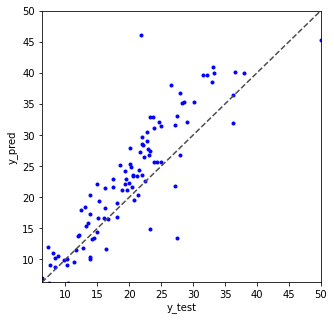

In [ ]:
# 결과 시각화

plt.figure(figsize=(5, 5))
plt.plot(y_test, y_pred, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('y_pred')